


# <div style="font-size: xxx-large">Python 2 - Następny poziom </div>
### <div style="font-size: xx-large">Wprowadzenie do <span style="color: cyan">programowania funkcjonalnego</span></div>
---
## <div style="font-size: xx-large">Paradygmaty programistycznie</div>
- ## Programowanie imperatywne - `if`, `for`, `while`
   - ### Programowanie proceduralne - tworzenie procedur, funkcji
- ## Programowanie <span style="color: cyan"><span style="color: cyan">funkcjonalne</span>
- ## Programowanie obiektowe
- ## Metaprogramowanie
 
---

W programowaniu funkcjonalnym staramy się całą logikę programu oprzec na dzialaniu funkcji w takim rozumieniu czysto matematycznym - funkcja ma argumenty, zwraca wartość, nie ma side effects

- Funkcje jako __*first-class citizens*__
- Iteratory
- Generatory
- List comprehensions
- Domknięcia/Closures
- Wyrażenia Lambda 
- Funkcje wyższego rzędu
  - Funkcje wyższego rzędu z biblioteki standardowej
    - `map()`
    - `filter()`
    - `reduce()`
  - Leniwa Ewaluacja
  - `Functools`
  - `Itertools`
  - Currying (Schoenfinkelizacja)
- Dekoratory funkcji

----
# Funkcje jako __*first-class citizens*__

In [1]:
def print_log(message):
    print(message)
    
def noop_log(message):
    pass

def get_log(mode):  # ta funkcja zwraca funkcje
    if env_mode == "dev":
        return print_log
    else: 
        return noop_log

In [7]:
env_mode="dev"

log = get_log(env_mode) # pod zmienną log podstawiamy funkcję get_log

In [8]:
# tym sposobem wywołujemy funkcję print_log

x=4
log(f'x is {x}')
x*=x
log(f'x is now {x}')

x is 4
x is now 16


In [4]:
env_mode="prod"

log=get_log(env_mode) # znowu podstawiamy funkcję get_log, ale z innym argumentem

In [5]:
# a teraz wywoła się funkcja noop_trlog

x=4
log(f'x is {x}')
x*=x
log(f'x is now {x}')

Dzięki takiemu podejściu pozbywamy się nadmiarowych ifów

W Paradygmacie funkcjonalnym klasyczne wyrażenia for, while if zastępujemy wyrażeniami funkcyjnymi

In [10]:
import pandas as pd
import numpy as np

def between(x, low, high):
    return x >= low and x <= high

s = pd.Series(np.random.randint(0, 10, 10))
s

0    1
1    0
2    1
3    4
4    9
5    5
6    4
7    5
8    4
9    7
dtype: int32

In [11]:
s.apply(between, args=(3,6)) # between jest funkcją i staje się argumentem - to jest programowanie funkcjonalne

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7     True
8     True
9    False
dtype: bool

In [12]:
s.apply(between, low = 3, high = 6)

0    False
1    False
2    False
3     True
4    False
5     True
6     True
7     True
8     True
9    False
dtype: bool

----

## Iterators

- `__iter__()` jest funkcją zwracającą iterator
- Iteratory mają metodę `__next__()` 
- Kończymy iterację wyjątkiem `StopIteration` 

In [ ]:
l = list(range(5))

for i in l:
    print(i)

In [ ]:
# ale uwaga! ten kod jest długi, leniwi programiści nie przepadają za takim

class Reverse():    
    def __init__(self, data):
        self.data = data
        self.index = len(data)
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.index == 0:
            raise StopIteration
        self.index = self.index-1
        return self.data[self.index]
    
for char in Reverse('Python'):
    print (char)

## Generatory

Generatory lepiej nadają się do tworzenia iteratorów

- tworzą iteratory
- używają `yield`
- Automatycznie stworzony `__next__` wraca do miejśca wyjścia

In [ ]:
def reverse(data):
    for index in range(len(data)-1, -1, -1):
        yield data[index]
        
for char in reverse('Python'):
    print (char)

In [13]:
# to będzie bardzo wolne! 
# bo wywołując funkcję dla k-tego elementu ciągu wywołujemy ją 2 ^ k razy

def fib(n):
    if n == 0 or n == 1:
        return n
    else:
        return fib(n-1) + fib(n-2)
        
for i in range(35):
    print ("n=%d => %d" % (i, fib(i)))

n=0 => 0
n=1 => 1
n=2 => 1
n=3 => 2
n=4 => 3
n=5 => 5
n=6 => 8
n=7 => 13
n=8 => 21
n=9 => 34
n=10 => 55
n=11 => 89
n=12 => 144
n=13 => 233
n=14 => 377
n=15 => 610
n=16 => 987
n=17 => 1597
n=18 => 2584
n=19 => 4181
n=20 => 6765
n=21 => 10946
n=22 => 17711
n=23 => 28657
n=24 => 46368
n=25 => 75025
n=26 => 121393
n=27 => 196418
n=28 => 317811
n=29 => 514229
n=30 => 832040
n=31 => 1346269
n=32 => 2178309
n=33 => 3524578
n=34 => 5702887


In [14]:
def fib(n):     # n - ile chcemy mieć wypisanych elementów
    a, b = 0, 1 # pierwsze 2 elementy ciągu 
    i=0
    while i < n:
        yield (i, a)
        a, b = b, a + b
        i += 1

for i, f in fib(35):
    print ("n=%d => %d" % (i, f))

n=0 => 0
n=1 => 1
n=2 => 1
n=3 => 2
n=4 => 3
n=5 => 5
n=6 => 8
n=7 => 13
n=8 => 21
n=9 => 34
n=10 => 55
n=11 => 89
n=12 => 144
n=13 => 233
n=14 => 377
n=15 => 610
n=16 => 987
n=17 => 1597
n=18 => 2584
n=19 => 4181
n=20 => 6765
n=21 => 10946
n=22 => 17711
n=23 => 28657
n=24 => 46368
n=25 => 75025
n=26 => 121393
n=27 => 196418
n=28 => 317811
n=29 => 514229
n=30 => 832040
n=31 => 1346269
n=32 => 2178309
n=33 => 3524578
n=34 => 5702887


### Generator expressions

In [16]:
(x*x for x in range(10))

<generator object <genexpr> at 0x00000215D3562030>

In [17]:
(x*y for x in range(10) for y in range(5))

<generator object <genexpr> at 0x00000215D3562180>

In [18]:
(x*x for x in range(10) if x % 2 == 0)

<generator object <genexpr> at 0x00000215D3561D20>

##  <div style="text-align: center">List + Generator Expression</div>

## $$=$$

##  <div style="text-align: center">List comprehension</div>

In [15]:
[x*y for x in range(4) for y in range(5)]

[0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 0, 2, 4, 6, 8, 0, 3, 6, 9, 12]

---

# Domknięcia/Closures

In [19]:
def add():
    c = 1 
    c = c + 2
    print(c)

add()

3


In [20]:
c = 1 # global variable
    
def add():
    c = c + 2 # ERROR!
    print(c)

add()

UnboundLocalError: local variable 'c' referenced before assignment

In [21]:
c = 1 # global variable
    
def add():
    global c
    c = c + 2 # NO ERROR!
    print(c)

add()

3


In [22]:
def makeinc(x):
    def inc(y):
        return y+x # domknięcie, czyli pamiec stworzonej funkcji inc
    return inc # czyli funkcja makeinc zwraca funkcję inc

inc5 = makeinc(5)


In [23]:
inc10 = makeinc(10)

In [24]:
inc10(2)

12

In [25]:
inc5(2)

7

In [26]:
def outer():
    y = 0
    def inner():
        nonlocal y
        y=y+1
        return y
    return inner

f = outer()
print ( f(), f(), f() )

1 2 3


---

# Wyrażenia Lambda

In [27]:
def f():
    print ("!")
    
g = f

g()

!


In [28]:
g = lambda: print ("!")

g()

!


lambda jest w stanie zastąpić nam def przy prostych funkcjach
Zasada: tylko jedno wyrażenie pythona dozwolone w lambdzie!

In [ ]:
a=list(range(-5,0,2))+list(range(0,6,2))
print(a)

In [ ]:
def square(x):
    return x*x

sorted(a,key = square)

In [ ]:
sorted(a,key = lambda x: x*x)

## Tylko jedno wyrażenie pythona w lambdzie
---
## ... a może więcej ?

Tego lepiej nie używać!!! to bardziej żeby pokazać możliwości

In [29]:
pr = lambda s:s
namenum = lambda x: (x==1 and pr("one")) or (x==2 and pr("two")) or (pr("other"))

namenum(1)

'one'

In [30]:
def echo_IMP():
    while 1:
        x = input("IMP ")
        if x == 'quit':
            break
        else:
            print (x)
            
echo_IMP()

In [1]:
def monadic_print(x):
    print (x)
    return x

echo_FP = lambda: monadic_print(input("FP "))=='quit' or echo_FP()

echo_FP()

In [1]:
import pandas as pd
import numpy as np

N=5

df = pd.DataFrame([ 
    [ row + col for col in range(1,N+1)]
    for row in range(0,N+1)
])

df.columns = [ f'{i}' for i in range(1,N+1)]
df = df.iloc[1:]
df

,1,2,3,4,5
1,2,3,4,5,6
2,3,4,5,6,7
3,4,5,6,7,8
4,5,6,7,8,9
5,6,7,8,9,10


In [ ]:
df.applymap(lambda x: x*x)

---

# Funkcje wyższego rzędu



## Map, filter, reduce

![title](img/rossum.jpg)

In [2]:
func = lambda x: x*x
seq = range(15)

print (list(
    map( func, seq ) # mapujemy funkcje kwadratową na ciąg kolejnych 15 liczb (od 0 do 14)
))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]


In [3]:
func = lambda x: x%2 == 0
seq = range(15)

print (list(
    filter( func, seq ) # na liście zostaja tylko te elementy, dla ktorych predykat jest prawdziwy 
                        # zatem zostaną tylko liczby parzyste
))

[0, 2, 4, 6, 8, 10, 12, 14]


In [4]:
print (list(
    map(lambda x: x*x, filter( lambda x: x%2==0, range(15) ))
))

[0, 4, 16, 36, 64, 100, 144, 196]


Powyżeej funkcje wyższego rzędu, poniżej konstrukcja list comprehention (generalnie LEPSZA, ale...)

In [ ]:
[ x*x for x in range(15) if x%2==0]

... ale funkcje wyższego rzędu są <span style="color: cyan">LENIWE</span>- a to działa na ich korzyść

### Leniwa Ewaluacja

In [5]:
range(15) # to nie jest gotowa lista, ale potencjalna lista liczb w tym zakresie

range(0, 15)

In [7]:
func = lambda x: x*x
seq = range(15)

print (
    map( func, seq ) 
)

# tu otrzymujemy mapę, która jest generatorem, ale nie listą samą w sobie nim ją utworzymy! 
# w ten sposó nie liczymy rzeczy na zapas, oszczedzamy czas, moc obliczeniowa i miejsce w pamięci

In [8]:
list(map( func, seq ))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196]

In [9]:
sum(range(15)) # tu np. omijamy liczy od 0 do 14 z osobna (nie musimy tworzyć im osobnych miejsc w pamięci)

105

In [10]:
from functools import reduce

func = lambda x,y: x+y
seq = range(15)

reduce( func, seq )

105

In [ ]:
from functools import reduce

def func(x, y):
    print(f'x: {x}, y: {y}')
    return x+y

seq = range(15)

reduce( func, seq )

In [ ]:
f = lambda a,b: a if (a > b) else b
reduce(f, [47,11,42,302,13])

In [ ]:
reduce(lambda x,y: x+' '+y, ['a','bb','ccc','dddd'])

In [ ]:
reduce(lambda x,y: x+' '+y, ['a','bb','ccc','dddd'], 'Result:')

----
### Operatory

In [11]:
from operator import add

reduce(add, range(15))

105

In [12]:
from operator import itemgetter

a = list(zip(range(15), range(15,0,-1)))
print(a)

[(0, 15), (1, 14), (2, 13), (3, 12), (4, 11), (5, 10), (6, 9), (7, 8), (8, 7), (9, 6), (10, 5), (11, 4), (12, 3), (13, 2), (14, 1)]


In [13]:
print(sorted(a, key = itemgetter(1))) # sortuje po 2gim elemencie pary

[(14, 1), (13, 2), (12, 3), (11, 4), (10, 5), (9, 6), (8, 7), (7, 8), (6, 9), (5, 10), (4, 11), (3, 12), (2, 13), (1, 14), (0, 15)]


---

In [14]:
from functools import partial

basetwo = partial(int, base=2)
basetwo.__doc__ = 'Convert base 2 string to an int.' # konwertujemy z systemu  dwójkowego na dziesiętny
basetwo('10010')

18

In [15]:
int("1000", base=2)

8

### Currying / Shönfinkelizacja

Haskell Curry (1900-1982) → Currying

Mojżesz Iljicz Schönfinkel (1889-1942)

In [16]:
import pandas as pd
import numpy as np

N=5

df = pd.DataFrame([ 
    [ row * col for col in range(1,N+1)]
    for row in range(0,N+1)
])

df.columns = [ f'{i}' for i in range(1,N+1)]
df = df.iloc[1:]
df

,1,2,3,4,5
1,1,2,3,4,5
2,2,4,6,8,10
3,3,6,9,12,15
4,4,8,12,16,20
5,5,10,15,20,25


In [17]:
format(9,"b")

'1001'

In [18]:
from operator import pow

def my_format(value, sformat):
    return format(value, sformat)

def my_pow(base, exponant):
    return pow(base, exponant)

In [19]:
import functools

def compose(*functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x) # tworzymy złożenie funkcji

$$
compose(f, g, h) = f \circ g \circ h
$$

$$
(f \circ g \circ h)(x) = f(g(h(x)))
$$

In [20]:
df.applymap(functools.partial(my_format, sformat="b"))
# otrzymujemy tabelkę w postaci binarnej

,1,2,3,4,5
1,1,10,11,100,101
2,10,100,110,1000,1010
3,11,110,1001,1100,1111
4,100,1000,1100,10000,10100
5,101,1010,1111,10100,11001


In [21]:
df.applymap(
    compose(
        functools.partial(
            my_format, sformat="b"
        ), 
        np.square
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


In [22]:
df.applymap(
    compose(
        partial(
            my_format, sformat="b"
        ), 
        np.square
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


In [23]:
df.applymap(
    compose(
        partial(
            my_format, sformat="b"
        ), 
        partial(
            my_pow, exponant=2
        )
    )
)

,1,2,3,4,5
1,1,100,1001,10000,11001
2,100,10000,100100,1000000,1100100
3,1001,100100,1010001,10010000,11100001
4,10000,1000000,10010000,100000000,110010000
5,11001,1100100,11100001,110010000,1001110001


---
### Itertools package

To są przykłady iteratorów:;;;;

In [25]:
from itertools import product

print (list(product('ABCD', repeat=2)))

#iloczyn kartezjański

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'C'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C'), ('D', 'D')]


In [26]:
from itertools import permutations

print (list(permutations('ABCD',  2))) # permutacje - losowanie z powtórzeniami

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'A'), ('B', 'C'), ('B', 'D'), ('C', 'A'), ('C', 'B'), ('C', 'D'), ('D', 'A'), ('D', 'B'), ('D', 'C')]


In [27]:
from itertools import combinations

print (list(combinations('ABCD',  2)))  # kombinacje - losowanie bez powtórzeń

[('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]


In [28]:
from itertools import dropwhile, chain, starmap, takewhile

In [29]:
list(dropwhile(lambda x: x<5, [1,4,6,4,1]))# obcina listę aż do momentu kiedy predykator przestaje byc spełniony

[6, 4, 1]

In [30]:
list(chain('ABC', 'DEF')) # skleja 

['A', 'B', 'C', 'D', 'E', 'F']

In [31]:
list(starmap(pow, [(2,5), (3,2), (10,3)]))

[32, 9, 1000]

In [32]:
list(takewhile(lambda x: x<5, [1,4,6,4,1])) # obcina liste do momentu aż wreszcie predykat zostanie spełniony

[1, 4]

In [33]:
list(zip("abcd",range(4)))

[('a', 0), ('b', 1), ('c', 2), ('d', 3)]

---

# Dekoratory

```python
@dec2
@dec1
def func(arg1, arg2, ...):
    pass

# is the same as:

def func(arg1, arg2, ...):
    pass

func = dec2(dec1(func))
```

In [34]:
def entryExit(f):
    def new_f():
        print ("Entering", f.__name__)
        f()
        print ("Exited", f.__name__)
    return new_f

@entryExit
def func1():
    print ("inside func1()")
    return 
    
func1()

Entering func1
inside func1()
Exited func1


In [35]:
import time 
import math 
  
def calculate_time(func): 
    def inner1(*args, **kwargs): 
        begin = time.time() 
        func(*args, **kwargs) 
        end = time.time() 
        print("Total time taken in : ", func.__name__, end - begin) 
    return inner1 
  
@calculate_time
def factorial(num): 
    time.sleep(2) # zasypiamy na 2 sekundy
    print(math.factorial(num)) 

    
factorial(10) # 10! (dziesięć silnia)

3628800
Total time taken in :  factorial 2.0011956691741943


In [36]:
class C_entryExit():
    def __init__(self, f):
        self.f = f
        self.n = 0
    def __call__(self):
        self.n+=1
        print ("Entering", self.f.__name__)
        self.f()
        print ("Exited", self.f.__name__)
        print ("Run times:", self.n)

@C_entryExit
def func1():
    print ("inside func1()")
    
func1()
func1()
func1()

Entering func1
inside func1()
Exited func1
Run times: 1
Entering func1
inside func1()
Exited func1
Run times: 2
Entering func1
inside func1()
Exited func1
Run times: 3


```python
@decorator(arg)
f()

# to samo co:


f = (decorator(arg))(f)
```

In [37]:
from functools import wraps
def user_has_permission(permission):
    return permission=='ADMIN'

class PermissionException(Exception):
    def __init__(self, message):
        super().__init__(message)

def authorize(permission=None):
    def _authorize(_func):
        @wraps(_func)
        def wrapper(*args, **kwargs):
            if permission:
                if user_has_permission(permission):
                    return _func(*args, **kwargs)
                else:
                    raise PermissionException(f"No {permission} rights")
        return wrapper
    return _authorize
                

In [38]:
@authorize("ADMIN")
def f():
    print("I am ROOT")
    
@authorize("SUPERADMIN")
def g():
    print("I am GROOT")

In [39]:
f()

I am ROOT


In [40]:
g() # Błąd!!

PermissionException: No SUPERADMIN rights

In [41]:
print(f.__name__)

f


---

# Różniczkowanie numeryczne korzystając z dekoratorów

### <span style="color: cyan">Epsilon maszynowy</span> to różnica między `1` a następną liczbą zmiennoprzecinkową



In [43]:
# chcemy policzyć jaki jest epsilon maszynowy

epsilon = 1.0 
while (1.0 + 0.5 * epsilon) != 1.0:
    epsilon = 0.5 * epsilon

epsilon

2.220446049250313e-16

In [44]:
# tu robimy to samo tylko prościej, liczymy z pomocą numpy 
import numpy as np

print(np.finfo(float).eps)

2.220446049250313e-16


In [45]:
np.power(2.0,-52) # liczba dla ktorej istnieje najmniejsza możliwa różnica między nią a 1

2.220446049250313e-16

## Pochodne funkcji

$$
 f'(x) = \lim_{ \epsilon \to 0} \frac{f(x+\epsilon) -f(x)}{\epsilon}
$$


![Differential](img/Derivative.svg.png)

https://en.wikipedia.org/wiki/Numerical_differentiation

$$
f'(x) \approx \frac{f(x+h) -f(x)}{h}
$$

## Lepiej:

$$
f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
$$

## Definicja `h`
$$
h = \sqrt\epsilon \, |x|
$$

## Albo (dla uniknięcia dzielenia przez `0`)

$$
h = \sqrt\epsilon \; max(\,|x|\,+\sqrt\epsilon\,)
$$



In [46]:
import numpy as np

eps = np.finfo(float).eps
sqrteps = np.sqrt(eps)

def derivative(f):
    def inner(x):        
        h = sqrteps * max( abs(x), sqrteps )
        return ( f(x+h) - f(x-h) ) / (2*h)
    return inner

@derivative    
def square(x):
    return x*x

In [47]:
square(1)

2.0

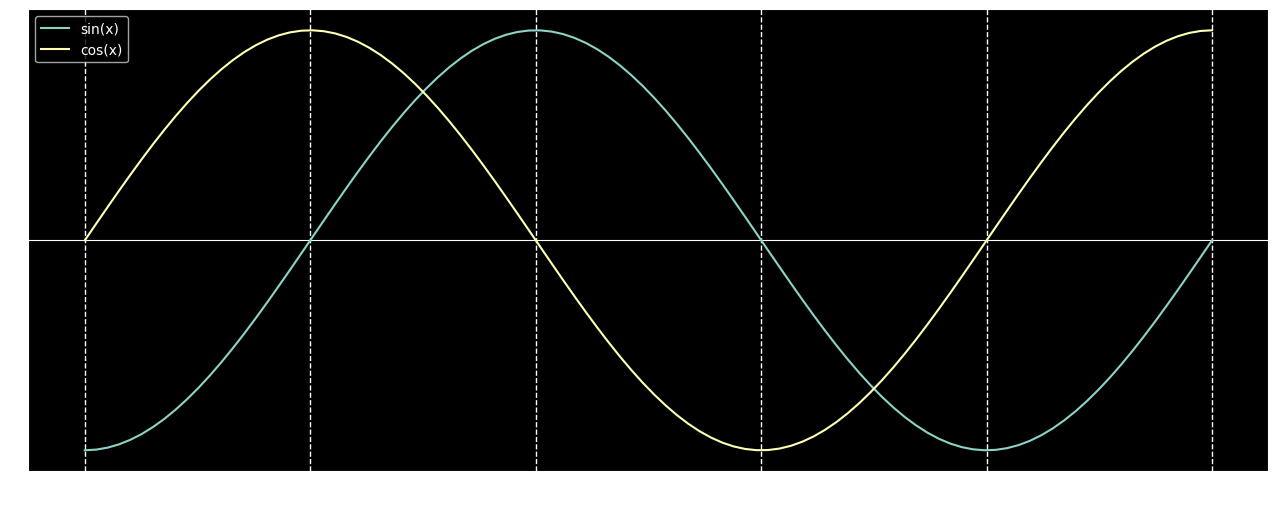

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tck

fig = plt.figure(figsize=(16,6))
plt.style.use("dark_background")
ax = fig.gca()
plt.rc('grid', linestyle="-", color='white')
x = np.linspace(-0.5, 2, 100)
plt.grid(True)
ax.set_yticks(np.arange(0, 1., 2))

ax.xaxis.grid(True,'major',linewidth=1)
ax.yaxis.grid(True,'minor',linewidth=1)
ax.xaxis.grid(True,'major',linestyle="--")

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))

line, = plt.plot(x, np.sin(x*np.pi))
line.set_label('sin(x)')
line, = plt.plot(x, np.cos(x*np.pi))
line.set_label('cos(x)')
ax.legend();


In [49]:
@derivative    
def sine_derivative(x): # tworzymy funkcje pochodna sinusa
    return np.sin(x)

In [50]:
sine_derivative(np.pi/2)

0.0

In [51]:
sine_derivative(0)

1.0

https://realpython.com/primer-on-python-decorators/#more-real-world-examples